In [1]:
import praw
import numpy as np
import pandas as pd

from datetime import datetime
import time
reddit_client_id = "r4RQ29Ib_bGl4A"
reddit_secret_key = "fMtsTTdf8NG4lIJPbl7X-C_2biB-0g"

In [3]:
reddit = praw.Reddit(
    client_id = reddit_client_id,
    client_secret = reddit_secret_key,
    user_agent = "PeterPan12138"
)
reddit.read_only

True

In [3]:
# To read existing post into table
posts = pd.read_csv(r'../data/posts.csv')
comments = pd.read_csv(r'../data/comments.csv')

In [5]:
comments

,post_id,comment_id,comment_text,time
0,mkapc2,gtk9hub,Anyone else have problems with chat scale rese...,2021-04-06 20:35:01
1,mkapc2,gtmd6qq,Wouldn't it make sense for luden's to build ou...,2021-04-07 06:06:26
2,mkapc2,gtmsoct,Why can’t I click on champ icons/role icons to...,2021-04-07 08:17:21
3,mkapc2,gtnxedc,"Hey, do I get EXP from a kill if I was close t...",2021-04-07 15:32:42
4,mkapc2,gtxq6ry,Anyone having an issue with chat scaling? The ...,2021-04-09 22:52:37
...,...,...,...,...
33171,ndxfqy,gyhjl50,NA is already known as the shittiest of the bi...,2021-05-18 04:15:32
33172,ndxfqy,gyhsk86,I will refuse to watch LCS if import restricti...,2021-05-18 05:21:18
33173,ndxfqy,gydef4m,I think they should do it... and also impose a...,2021-05-17 05:48:42
33174,neeb4p,gykv4el,[deleted],2021-05-18 23:29:01


In [4]:
subreddit = reddit.subreddit("leagueoflegends").hot(limit = 500)

In [5]:
# Data gathering
start = time.time()
user_ids = []
user_names = []
time_stamps = []
texts = []
post_ids = []
comments = []
num_upvotes = []

for submission in subreddit:
    if submission.selftext != "":
        try:
            user_ids.append(submission.author.id)
            user_names.append(submission.author.name)
            time_stamps.append(datetime.fromtimestamp(submission.created_utc))
            texts.append(submission.selftext)
            post_ids.append(submission.id)
            comments.append(submission.comments)
            num_upvotes.append(submission.score)
        except:
            pass


In [6]:
new_posts = pd.DataFrame({
            'user_id' : user_ids,
            'user_name' : user_names,
            'text' : texts,
            'time' : time_stamps,
            'num_upvotes' : num_upvotes,
            'post_id' : post_ids
        })
end = time.time()
print('It took {} seconds to get {} posts.'.format(end - start, len(post_ids)))
posts = posts.append(new_posts, ignore_index = True)
posts.drop_duplicates(subset="post_id", keep="first", inplace=True)
print('Now there are {} posts'.format(len(posts)))

It took 907.8528878688812 seconds to get 288 posts.
Now there are 3146 posts


In [5]:
posts

,user_id,user_name,text,time,num_upvotes,post_id
0,d5vs0,TomShoe02,###LEC 2021 SPRING PLAYOFFS\n \n[Lolesports](h...,2021-03-28 22:02:47,4.0,mf191w
1,gx1fs,untamedlazyeye,[Bug Megathread](https://www.reddit.com/r/leag...,2021-03-17 21:46:44,111.0,m70rop
2,i3gu0,bellanax,I was jealous of the Gangplank cross stitch I ...,2021-03-28 16:28:33,2924.0,mexggy
3,7qg2cdeo,Sharpest_Blade,"T1 smash the game, winning the match convincin...",2021-03-28 17:28:25,513.0,mey6py
4,1nrbl8m,G2Minion,###LEC 2021 SPRING PLAYOFFS \n...,2021-03-28 04:48:45,6015.0,memcr3
...,...,...,...,...,...,...
3141,8hkkgifk,Creepy_Pilot1200,Sure the team didn't live up to expectations a...,2021-05-19 21:32:50,0.0,ng5ykp
3142,37ubwiuk,RolandTheBot,Name: TBD\n\nRole: Controller\n\nLanes: top (m...,2021-05-19 05:11:56,1.0,nfmel2
3143,1fyepzba,trytolasthit,What are you guyz saying about buffed Kayle + ...,2021-05-19 08:54:49,0.0,nfrhtc
3144,5ljxoq2p,Blood_Born11,"Hi guys 😀. Can mages like syndra, ahri, and Le...",2021-05-19 05:01:57,1.0,nfm5mv


In [6]:
posts.to_csv(r'../data/posts.csv', index=False)

In [7]:
comment_posts = pd.read_csv(r'../data/comments.csv')

In [10]:
len(comment_posts)

29118

In [11]:
# Getting the comments

comment_post_ids = []
comment_ids = []
comment_texts = []
comment_time_stamps = []
for post_id_index, post_id in enumerate(post_ids):
    for comment in comments[post_id_index]:
        if type(comment) is praw.models.Comment:
            comment_post_ids.append(post_id)
            comment_ids.append(comment.id)
            comment_texts.append(comment.body)
            comment_time_stamps.append(datetime.fromtimestamp(comment.created_utc))
# Only getting the comments in the first layer

#         elif type(comment) is praw.models.MoreComments:
#             for more_comment in comment.comments():
#                 print(post_id_index)
#                 comment_post_ids.append(post_id)
#                 comment_ids.append(more_comment.id)
#                 comment_texts.append(more_comment.body)
#                 comment_time_stamps.append(datetime.fromtimestamp(more_comment.created_utc))

In [12]:
new_comment_posts = pd.DataFrame({
    'post_id' : comment_post_ids,
    'comment_id' : comment_ids,
    'comment_text' : comment_texts,
    'time' : comment_time_stamps
})
comment_posts = comment_posts.append(new_comment_posts, ignore_index = True)
comment_posts.drop_duplicates(subset="comment_id", keep="first", inplace=True)
comment_posts

,post_id,comment_id,comment_text,time
0,mkapc2,gtk9hub,Anyone else have problems with chat scale rese...,2021-04-06 20:35:01
1,mkapc2,gtmd6qq,Wouldn't it make sense for luden's to build ou...,2021-04-07 06:06:26
2,mkapc2,gtmsoct,Why can’t I click on champ icons/role icons to...,2021-04-07 08:17:21
3,mkapc2,gtnxedc,"Hey, do I get EXP from a kill if I was close t...",2021-04-07 15:32:42
4,mkapc2,gtxq6ry,Anyone having an issue with chat scaling? The ...,2021-04-09 22:52:37
...,...,...,...,...
33930,ndxfqy,gyhjl50,NA is already known as the shittiest of the bi...,2021-05-18 04:15:32
33931,ndxfqy,gyhsk86,I will refuse to watch LCS if import restricti...,2021-05-18 05:21:18
33941,ndxfqy,gydef4m,I think they should do it... and also impose a...,2021-05-17 05:48:42
33961,neeb4p,gykv4el,[deleted],2021-05-18 23:29:01


In [8]:
comment_posts.to_csv(r'/Users/zengpeifan/Stats 170A/Final Project/Data/comments.csv', index=False)

In [2]:
# Data wrangling
import nltk
import re
from gensim.models import word2vec
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import WordNetLemmatizer  
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.downloader.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

/Users/zengpeifan/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zengpeifan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zengpeifan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zengpeifan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zengpeifan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# Word2vec

post_corpus = [post_text for post_text in posts.text]
comment_corpus = [comment_text for comment_text in comment_posts.comment_text]

post_tok_corp = [nltk.word_tokenize(sentence) for sentence in post_corpus]
comment_tok_corp = [nltk.word_tokenize(sentence) for sentence in comment_corpus if isinstance(sentence, str)]

def lemmatize_word(word):
    return wordnet_lemmatizer.lemmatize(word)

# To remove words that we do not need to look at
def remove_stopwords(target_list):
    self_defined_stopwords = ['champion', 'play', 'item', 'even', 'one', 'team', 'really', 
                              'player', 'time', 'know', 'people', 'make', 'game', 'think', 
                              'wa', 'ha', 'champ', 'new', 'doe', 'feel', 'want',
                              'enemy', 'see', 'playing', 'way', 'need', 'still', 'riot', 
                              'support', 'much', 'lot', 'league', 'every', 'first',
                              'jungle', 'go', 'thing', 'give', 'back', 'gwen', 'something',
                              'season', 'top', 'got', 'build', 'say', 'season','played',
                              'take', 'skin', 'lane', 'ap', 'change', 'mid', 'many', 'adc',
                              'second', 'level', 'ability', 'someone', 'right', 'match']
    result = re.compile('^[a-zA-Z]{2,}$')
    target_list = [lemmatize_word(word.lower()) for word in target_list]
    return [word for word in target_list if result.match(word) and word not in stopwords.words('english') and word not in self_defined_stopwords]

post_tok_corp = [remove_stopwords(word_list) for word_list in post_tok_corp]
comment_tok_corp = [remove_stopwords(word_list) for word_list in comment_tok_corp]

In [11]:
post_model = word2vec.Word2Vec(post_tok_corp, min_count=10, sg = 1)
comment_model = word2vec.Word2Vec(comment_tok_corp, min_count=10, sg = 1)

In [12]:
champions = pd.read_csv(r'/Users/zengpeifan/Stats 170A/Final Project/Data/champions.txt', delimiter = ",", header=None).values.tolist()[0]
champions = [champion.lower() for champion in champions]

In [13]:
champion_names_post = []
champion_occur_times = []
for sentence in post_tok_corp:
    for word in sentence:
        if word in champions:
            champion_names_post.append(word)

champion_names_comment = []
for sentence in comment_tok_corp:
    for word in sentence:
        if word in champions:
            champion_names_comment.append(word)
            
champ_str_post = " ".join(champion_names_post)
champ_str_comment = " ".join(champion_names_comment)

In [44]:
# Creating the word cloud
# Data visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

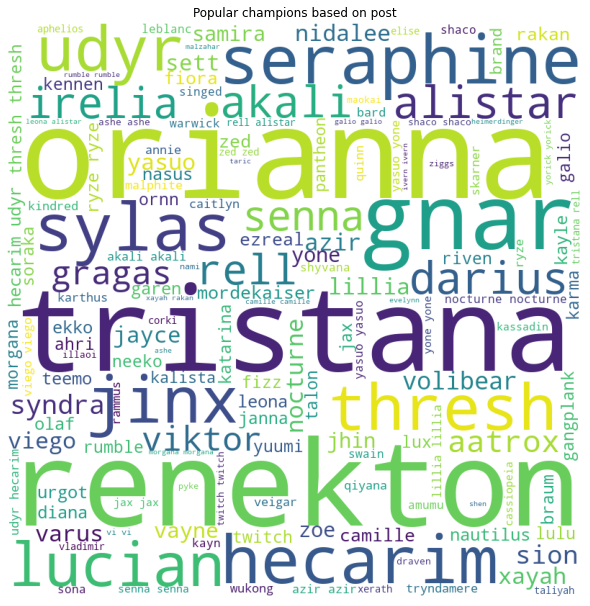

In [28]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(champ_str_post)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Popular champions based on post")

plt.show()

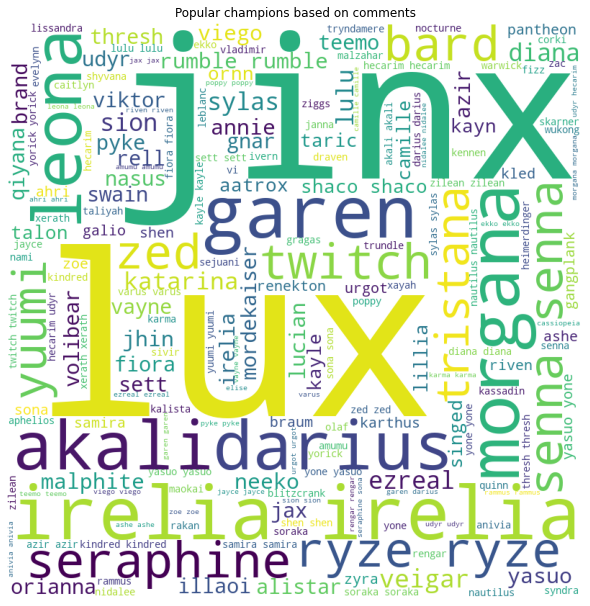

In [29]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(champ_str_comment)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Popular champions based on comments")

plt.show()

In [45]:
post_tok_sentence = ''
for sentence in post_tok_corp:
    post_tok_sentence += ' '.join(sentence)
    
comment_tok_sentence = ''
for sentence in comment_tok_corp:
    comment_tok_sentence += ' '.join(sentence)

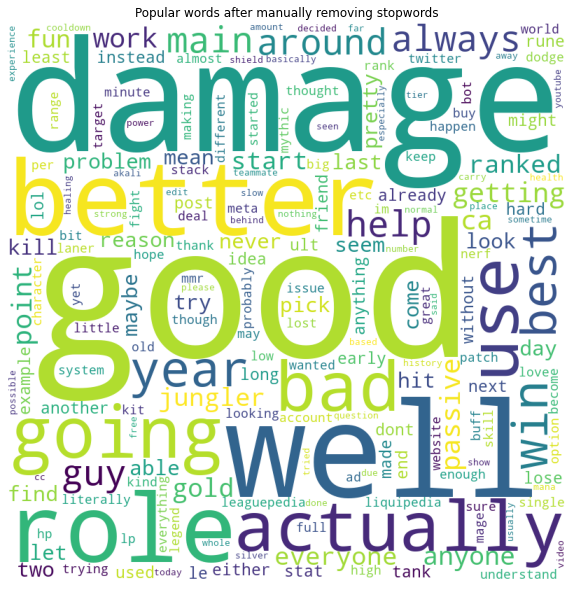

In [46]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(post_tok_sentence)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Popular words after manually removing stopwords")
plt.tight_layout(pad = 0)
  
plt.show()

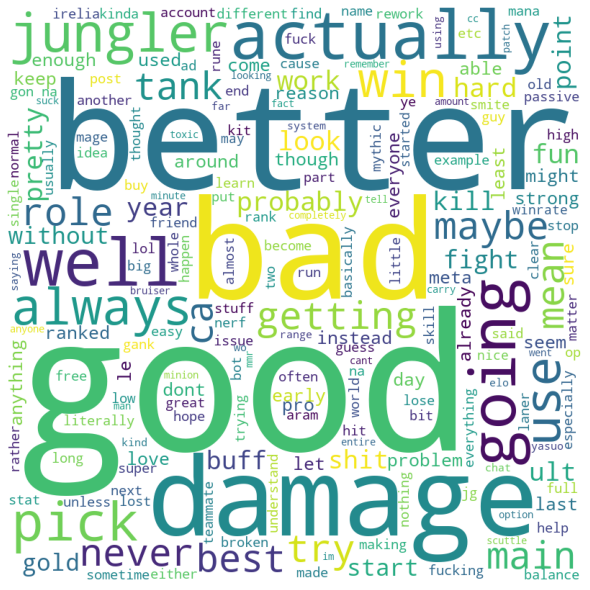

In [32]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_tok_sentence)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

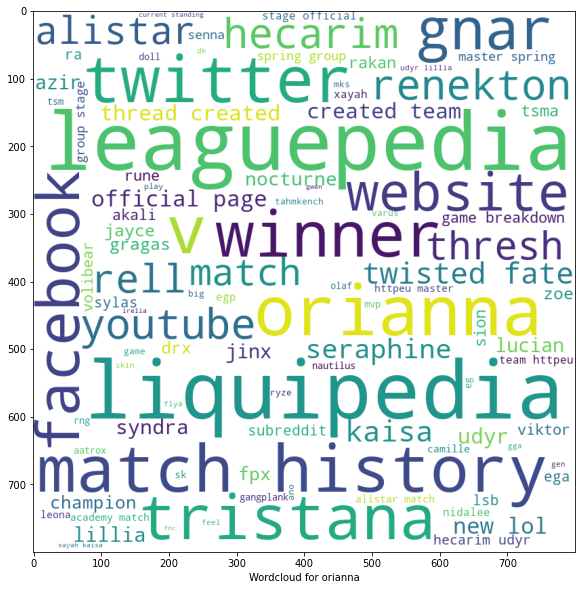

Showing wordcloud for orianna


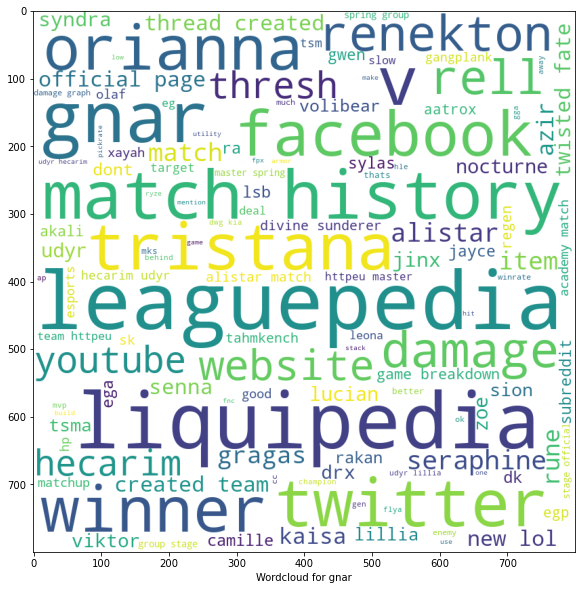

Showing wordcloud for gnar


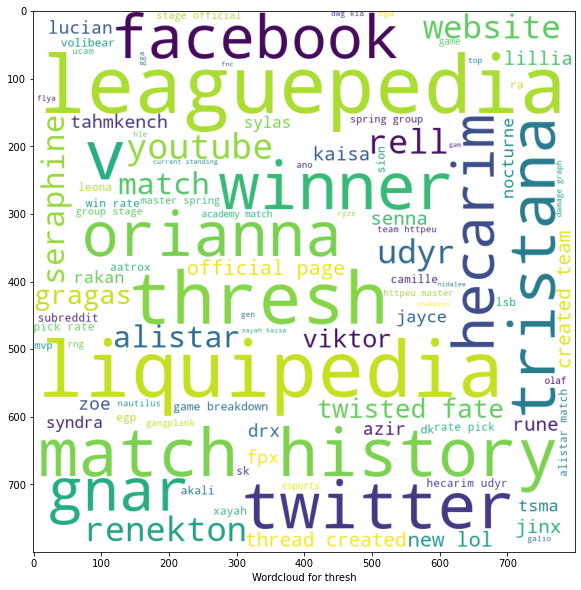

Showing wordcloud for thresh


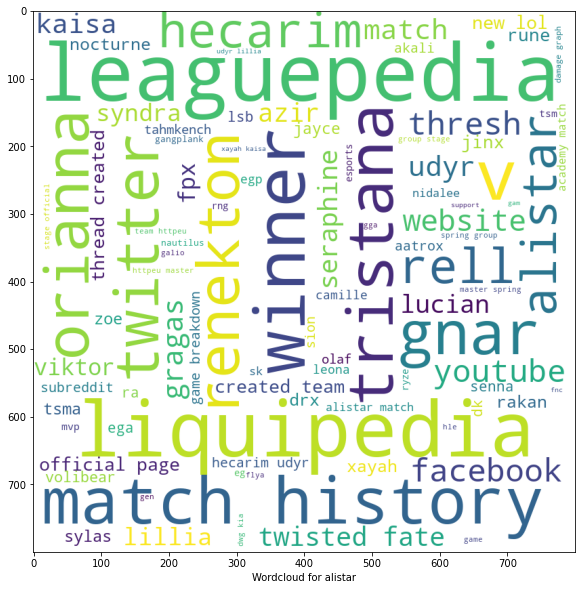

Showing wordcloud for alistar


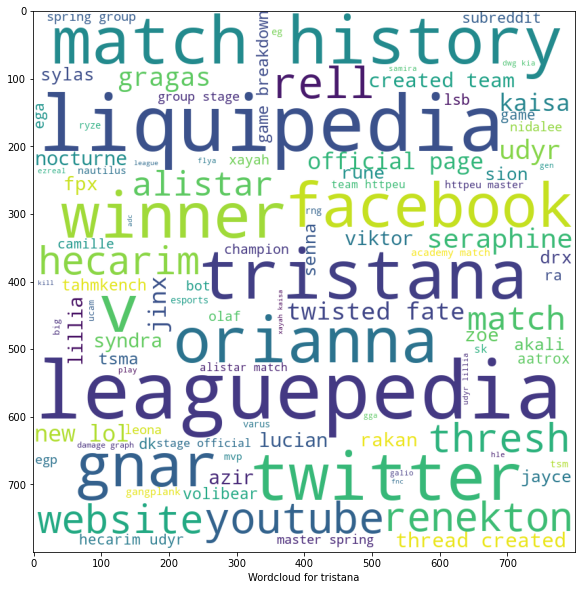

Showing wordcloud for tristana


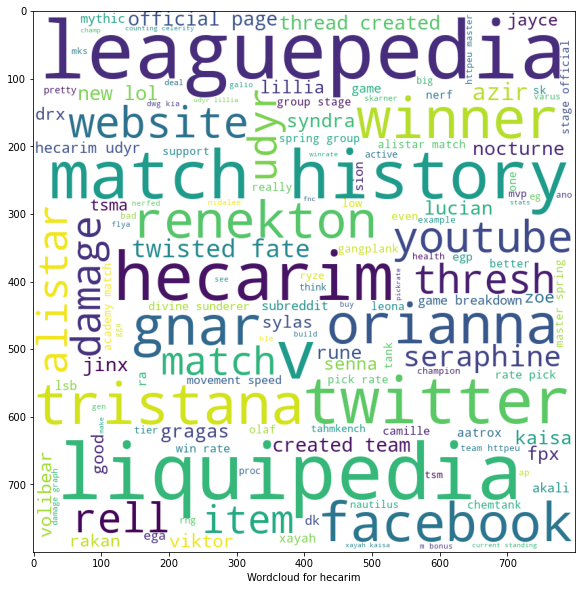

Showing wordcloud for hecarim


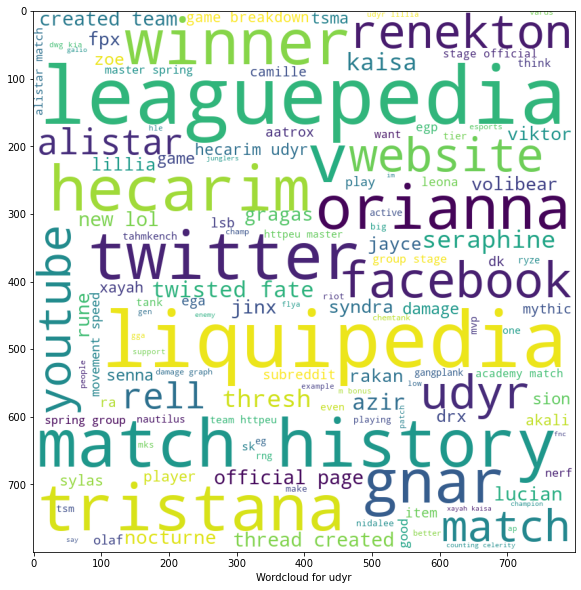

Showing wordcloud for udyr


In [86]:
popular_champions = ['orianna', 'gnar', 'thresh', 'alistar', 'tristana', 'hecarim', 'udyr']
def create_word_cloud(champion):
    champion_sentence = champion_related_sentence[champions.index(champion)]
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(champion_sentence)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.xlabel('Wordcloud for {}'.format(champion))
    plt.tight_layout(pad = 0)

    plt.show()
    
    print("Showing wordcloud for {}".format(champion))
    
for champion in popular_champions:
    create_word_cloud(champion)

In [14]:
# Model building and training
def get_occur_times(corpus):
    occur_dict = dict()
    for word_list in corpus:
        for word in word_list:
            for champion in champions:
                if word.lower() == champion.lower():
                    if champion in occur_dict:
                        occur_dict[champion] += 1
                    else:
                        occur_dict[champion] = 1
                         
    occur_list = [0 for i in range(len(champions))]
    for champion in champions:
        if champion in occur_dict.keys():
            occur_list[champions.index(champion)] = occur_dict[champion]
        else:
            occur_list[champions.index(champion)] = 0
    return occur_list
post_occur_list = get_occur_times(post_tok_corp)
comment_occur_list = get_occur_times(comment_tok_corp)

In [15]:
def get_related_champions(keyword, model):
    result = []
    for score_pair in model.wv.most_similar(keyword, topn=1500):
        if score_pair[0] in champions:
            result.append(score_pair)
    return result

In [16]:
positive_keyword = ['powerful', 'broken', 'strong', 'good', 'better', 'well', 'damage', 'snowball', 'best']
negative_keyword = ['useless', 'weak', 'bad']
post_positive_realted_champions = []
post_negative_realted_champions = []
comment_positive_realted_champions = []
comment_negative_realted_champions = []

def populate_champions(keywords, champions_list, model):
    for keyword in keywords:
        champions_list.append(get_related_champions(keyword, model))

populate_champions(positive_keyword, post_positive_realted_champions, post_model)
populate_champions(negative_keyword, post_negative_realted_champions, post_model)
populate_champions(positive_keyword, comment_positive_realted_champions, comment_model)
populate_champions(negative_keyword, comment_negative_realted_champions, comment_model)

In [17]:
from sklearn import preprocessing
post_positive_counts = np.array([len(word_list) for word_list in post_positive_realted_champions])
post_negative_counts = np.array([len(word_list) for word_list in post_negative_realted_champions])
post_positive_counts_norm = np.ndarray.tolist(preprocessing.normalize([post_positive_counts]))[0]
post_negative_counts_norm = np.ndarray.tolist(preprocessing.normalize([post_negative_counts]))[0]

comment_positive_counts = np.array([len(word_list) for word_list in comment_positive_realted_champions])
comment_negative_counts = np.array([len(word_list) for word_list in comment_negative_realted_champions])
comment_positive_counts_norm = np.ndarray.tolist(preprocessing.normalize([comment_positive_counts]))[0]
comment_negative_counts_norm = np.ndarray.tolist(preprocessing.normalize([comment_negative_counts]))[0]

In [18]:
post_scores = dict()
comment_scores = dict()

def populate_scores(scores, positive_realted_champions, negative_realted_champions, positive_counts_norm, negative_counts_norm):
    for i in range(len(positive_keyword)):
        champion_scores = positive_realted_champions[i]
        for score_pair in champion_scores:
            champion_name = score_pair[0]
            score = score_pair[1]
            if champion_name in scores:
                scores[champion_name] = scores[champion_name] + positive_counts_norm[i]*score
            else:
                scores[champion_name] = positive_counts_norm[i]*score

    for i in range(len(negative_keyword)):
        champion_scores = negative_realted_champions[i]
        for score_pair in champion_scores:
            champion_name = score_pair[0]
            score = score_pair[1]
            if champion_name in scores:
                if isinstance(scores[champion_name], float):
                    scores[champion_name] = (scores[champion_name], negative_counts_norm[i]*score)
                else:
                    scores[champion_name] = (scores[champion_name][0], scores[champion_name][1] + negative_counts_norm[i]*score)
            else:
                scores[champion_name] = (0, negative_counts_norm[i]*score)

    for key in scores.keys():
        if isinstance(scores[key], float):
            scores[key] = (scores[key] / sum(positive_counts_norm), 0)
        else:
            scores[key] = (scores[key][0] / sum(positive_counts_norm), scores[key][1] / sum(negative_counts_norm))
    
    return scores


post_scores = populate_scores(post_scores, post_positive_realted_champions, post_negative_realted_champions, post_positive_counts_norm, post_negative_counts_norm)
comment_scores = populate_scores(comment_scores, comment_positive_realted_champions, comment_negative_realted_champions, comment_positive_counts_norm, comment_negative_counts_norm)

In [19]:
post_positive_scores = [0 for i in range(len(champions))]
post_negative_scores = [0 for i in range(len(champions))]
comment_positive_scores = [0 for i in range(len(champions))]
comment_negative_scores = [0 for i in range(len(champions))]

def generate_score_list(scores, positive_scores, negative_scores):
    for champion_name in scores.keys():
        pos_score = scores[champion_name][0]
        neg_score = scores[champion_name][1]

        positive_scores[champions.index(champion_name)] = pos_score
        negative_scores[champions.index(champion_name)] = neg_score

generate_score_list(post_scores, post_positive_scores, post_negative_scores)
generate_score_list(comment_scores, comment_positive_scores, comment_negative_scores)

In [20]:
# Generates the results to be put in the final table
champion_id_name_dict = {266: 'Aatrox', 103: 'Ahri', 84: 'Akali', 12: 'Alistar', 32: 'Amumu',34: 'Anivia',1: 'Annie',523: 'Aphelios', 22: 'Ashe', \
               136: 'Aurelion Sol',268: 'Azir' ,432: 'Bard',53: 'Blitzcrank', 63: 'Brand', 201: 'Braum',51: 'Caitlyn',164: 'Camille' ,\
               69: 'Cassiopeia',31: "Cho'Gath",42: 'Corki',122: 'Darius',131: 'Diana',119: 'Draven',36: 'Dr. Mundo',245: 'Ekko', \
               60: 'Elise',28: 'Evelynn',81: 'Ezreal',9: 'Fiddlesticks',114: 'Fiora',105: 'Fizz',3: 'Galio',41: 'Gangplank', \
               86: 'Garen',150: 'Gnar', 79: 'Gragas',104: 'Graves',120: 'Hecarim',74: 'Heimerdinger',420: 'Illaoi',39: 'Irelia',\
               427: 'Ivern',40: 'Janna',59: 'Jarvan IV', 24: 'Jax', 126: 'Jayce', 202: 'Jhin', 222: 'Jinx',145: "Kai'Sa", \
               429: 'Kalista', 43: 'Karma', 30: 'Karthus', 38: 'Kassadin', 55: 'Katarina', 10: 'Kayle', 141: 'Kayn', 85: 'Kennen', \
               121: "Kha'Zix",203: 'Kindred',240: 'Kled',96: "Kog'Maw",7: 'LeBlanc',64: 'Lee Sin',89: 'Leona',876: 'Lillia', \
               127: 'Lissandra', 236: 'Lucian',117: 'Lulu',99: 'Lux',54: 'Malphite',90: 'Malzahar',57: 'Maokai',11: 'Master Yi', \
               21: 'Miss Fortune',62: 'Wukong',82: 'Mordekaiser',25: 'Morgana',267: 'Nami',75: 'Nasus',111: 'Nautilus',518: 'Neeko', \
               76: 'Nidalee',56: 'Nocturne',20: 'Nunu and Willump',2: 'Olaf',61: 'Orianna',516: 'Ornn',80: 'Pantheon',78: 'Poppy', \
               555: 'Pyke',246: 'Qiyana',133: 'Quinn',497: 'Rakan',33: 'Rammus',421: "Rek'Sai",526: 'Rell',58: 'Renekton', \
               107: 'Rengar',92: 'Riven',68: 'Rumble',13: 'Ryze',360: 'Samira',113: 'Sejuani',235: 'Senna',147: 'Seraphine', \
               875: 'Sett',35: 'Shaco',98: 'Shen',102: 'Shyvana',27: 'Singed',14: 'Sion',15: 'Sivir',72: 'Skarner',37: 'Sona', \
               16: 'Soraka',50: 'Swain', 517: 'Sylas',134: 'Syndra',223: 'Tahm Kench',163: 'Taliyah',91: 'Talon',44: 'Taric', \
               17: 'Teemo',412: 'Thresh',18: 'Tristana',48: 'Trundle',23: 'Tryndamere',4: 'Twisted Fate',29: 'Twitch',77: 'Udyr', \
               6: 'Urgot',110: 'Varus',67: 'Vayne',45: 'Veigar',161: "Vel'Koz",254: 'Vi',234: 'Viego',112: 'Viktor',8: 'Vladimir',\
               106: 'Volibear',19: 'Warwick',498: 'Xayah',101: 'Xerath',5: 'Xin Zhao',157: 'Yasuo',777: 'Yone',83: 'Yorick', \
               350: 'Yuumi',154: 'Zac',238: 'Zed',115: 'Ziggs',26: 'Zilean',142: 'Zoe',143: 'Zyra', 887: 'Gwen'}
champion_ids = [0 for i in range(len(champions))]
for id in champion_id_name_dict.keys():
    champion_name = champion_id_name_dict[id].lower()
    champion_ids[champions.index(champion_name)] = id
champion_ids

[266,
 103,
 84,
 12,
 32,
 34,
 1,
 523,
 22,
 136,
 268,
 432,
 53,
 63,
 201,
 51,
 164,
 69,
 31,
 42,
 122,
 131,
 36,
 119,
 245,
 60,
 28,
 81,
 9,
 114,
 105,
 3,
 41,
 86,
 150,
 79,
 104,
 887,
 120,
 74,
 420,
 39,
 427,
 40,
 59,
 24,
 126,
 202,
 222,
 145,
 429,
 43,
 30,
 38,
 55,
 10,
 141,
 85,
 121,
 203,
 240,
 96,
 7,
 64,
 89,
 876,
 127,
 236,
 117,
 99,
 54,
 90,
 57,
 11,
 21,
 82,
 25,
 267,
 75,
 111,
 518,
 76,
 56,
 20,
 2,
 61,
 516,
 80,
 78,
 555,
 246,
 133,
 497,
 33,
 421,
 526,
 58,
 107,
 92,
 68,
 13,
 360,
 113,
 235,
 147,
 875,
 35,
 98,
 102,
 27,
 14,
 15,
 72,
 37,
 16,
 50,
 517,
 134,
 223,
 163,
 91,
 44,
 17,
 412,
 18,
 48,
 23,
 4,
 29,
 77,
 6,
 110,
 67,
 45,
 161,
 254,
 234,
 112,
 8,
 106,
 19,
 62,
 498,
 101,
 5,
 157,
 777,
 83,
 350,
 154,
 238,
 115,
 26,
 142,
 143]

In [21]:
champion_strength_info = pd.DataFrame({
    'champion_name': champions,
    'champion_id': champion_ids,
    'post_mentioned_times': post_occur_list,
    'comment_mentioned_times': comment_occur_list,
    'post_positive_score': post_positive_scores,
    'post_negative_score': post_negative_scores,
    'comment_positive_score': comment_positive_scores,
    'comment_negative_score': comment_negative_scores
})
champion_strength_info

,champion_name,champion_id,post_mentioned_times,comment_mentioned_times,post_positive_score,post_negative_score,comment_positive_score,comment_negative_score
0,aatrox,266,71,123,0.378844,0.558948,0.172757,0.000000
1,ahri,103,50,119,0.403894,0.583314,0.374068,0.314070
2,akali,84,121,208,0.386682,0.551656,0.194414,0.000000
3,alistar,12,114,78,0.000000,0.000000,0.206413,0.000000
4,amumu,32,22,80,0.669176,0.590049,0.471913,0.336918
...,...,...,...,...,...,...,...,...
150,zed,238,88,209,0.701034,0.846829,0.000000,0.000000
151,ziggs,115,18,62,0.726745,0.790833,0.659020,0.642804
152,zilean,26,17,108,0.759218,0.811068,0.615728,0.304564
153,zoe,142,78,143,0.000000,0.529418,0.000000,0.000000


In [22]:
champion_strength_info.to_csv(r'/Users/zengpeifan/Stats 170A/Final Project/Data/champion_strength.csv', index=False)

In [8]:
# Take a random sample of 100 observations for validation
sample_matches_wr = matches_wr.sample(n = 100)
sample_matches_wr.to_csv(r'/Users/zengpeifan/Stats 170A/Final Project/Data/sample_final_match_table.csv')

In [6]:
def updateCMTable(target_type):
    for team in ["Team1", "Team2"]:
        for player in ["P1", "P2", "P3", "P4", "P5"]:
            occur_times = []
            positive_scores = []
            negative_scores = []

            for c_id in matches_wr[team + player]:
                occur_times.append(champion_strength_info[champion_strength_info['champion_id'] == c_id][target_type.lower() + '_mentioned_times'].values[0])
                positive_scores.append(champion_strength_info[champion_strength_info['champion_id'] == c_id][target_type.lower() + '_positive_score'].values[0])
                negative_scores.append(champion_strength_info[champion_strength_info['champion_id'] == c_id][target_type.lower() + '_negative_score'].values[0])

            matches_wr[team + player + target_type + 'ChampOccurTimes'] = occur_times
            matches_wr[team + player + target_type + 'PositiveScore'] = positive_scores
            matches_wr[team + player + target_type + 'NegativeScore'] = negative_scores
            

updateCMTable('Post')
updateCMTable('Comment')

KeyboardInterrupt: 

In [6]:
matches_wr.to_csv(r'/Users/zengpeifan/Stats 170A/Final Project/Data/CMWRLP1_ChampStrength.csv', index = False)


In [32]:
y_sample = sample_matches_wr['TeamTwoWin']
X_sample = sample_matches_wr[['T1P1LP', 'T1P2LP', 'T1P3LP', 'T1P4LP', 'T1P5LP', 'T2P1LP', 'T2P2LP', 'T2P3LP', 'T2P4LP', 'T2P5LP',
                'Team1P1PostChampOccurTimes', 'Team1P2PostChampOccurTimes', 'Team1P3PostChampOccurTimes', 'Team1P4PostChampOccurTimes', 'Team1P5PostChampOccurTimes', 
                'Team2P1PostChampOccurTimes', 'Team2P2PostChampOccurTimes', 'Team2P3PostChampOccurTimes', 'Team2P4PostChampOccurTimes', 'Team2P5PostChampOccurTimes',
                'Team1P1PostPositiveScore', 'Team1P2PostPositiveScore', 'Team1P3PostPositiveScore', 'Team1P4PostPositiveScore', 'Team1P5PostPositiveScore', 
                'Team2P1PostPositiveScore', 'Team2P2PostPositiveScore', 'Team2P3PostPositiveScore', 'Team2P4PostPositiveScore', 'Team2P5PostPositiveScore',
                'Team1P1CommentNegativeScore', 'Team1P2CommentNegativeScore', 'Team1P3CommentNegativeScore', 'Team1P4CommentNegativeScore', 'Team1P5CommentNegativeScore', 
                'Team2P1CommentNegativeScore', 'Team2P2CommentNegativeScore', 'Team2P3CommentNegativeScore', 'Team2P4CommentNegativeScore', 'Team2P5CommentNegativeScore',
                'T1P1ChampWR', 'T1P2ChampWR', 'T1P3ChampWR', 'T1P4ChampWR', 'T1P5ChampWR',
                'T2P1ChampWR', 'T2P2ChampWR', 'T2P3ChampWR', 'T2P4ChampWR', 'T2P5ChampWR']]

In [40]:
y_sample_pred = clf.predict(X_sample)
print("Accuracy:",metrics.accuracy_score(y_sample, y_sample_pred))

Accuracy: 0.93


In [41]:
y_sample_pred

array(['Fail', 'Fail', 'Win', 'Win', 'Win', 'Fail', 'Fail', 'Fail', 'Win',
       'Fail', 'Fail', 'Fail', 'Win', 'Win', 'Fail', 'Win', 'Win', 'Win',
       'Win', 'Fail', 'Fail', 'Fail', 'Win', 'Win', 'Fail', 'Fail', 'Win',
       'Win', 'Fail', 'Win', 'Win', 'Fail', 'Win', 'Fail', 'Fail', 'Win',
       'Win', 'Fail', 'Fail', 'Win', 'Win', 'Win', 'Fail', 'Win', 'Fail',
       'Win', 'Win', 'Fail', 'Win', 'Win', 'Fail', 'Win', 'Win', 'Win',
       'Fail', 'Win', 'Fail', 'Win', 'Win', 'Win', 'Win', 'Fail', 'Win',
       'Win', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail',
       'Win', 'Win', 'Fail', 'Win', 'Fail', 'Fail', 'Win', 'Win', 'Win',
       'Win', 'Fail', 'Fail', 'Win', 'Win', 'Win', 'Fail', 'Win', 'Fail',
       'Fail', 'Fail', 'Win', 'Win', 'Fail', 'Win', 'Fail', 'Fail',
       'Fail', 'Win', 'Fail'], dtype=object)